In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
%matplotlib inline
sns.set()

In [200]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_df = pd.read_csv('sample_submission.csv')

In [201]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [202]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [203]:
sample_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [204]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [205]:
#concatenate the train and test data
data = pd.concat([train_df, test_df], axis = 0)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [206]:
data.shape

(2919, 81)

In [207]:
data_temp = data.copy()
data_temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [208]:
data_temp.isna().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [209]:
# using a pandas function to check for numerical columns
for label, content in data_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

Id
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [210]:
#check for categorical features
for label, content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [211]:
# check for missing numerical columns
for label, content in data_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

LotFrontage
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
BsmtFullBath
BsmtHalfBath
GarageYrBlt
GarageCars
GarageArea
SalePrice


### Filling the missing numerical columns

In [212]:
# change strings to categories
for label, content in data_temp.items():
    if pd.api.types.is_string_dtype(content):
        data_temp[label] = content.astype('category').cat.as_ordered()

In [213]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             2919 non-null   int64   
 1   MSSubClass     2919 non-null   int64   
 2   MSZoning       2915 non-null   category
 3   LotFrontage    2433 non-null   float64 
 4   LotArea        2919 non-null   int64   
 5   Street         2919 non-null   category
 6   Alley          198 non-null    category
 7   LotShape       2919 non-null   category
 8   LandContour    2919 non-null   category
 9   Utilities      2917 non-null   category
 10  LotConfig      2919 non-null   category
 11  LandSlope      2919 non-null   category
 12  Neighborhood   2919 non-null   category
 13  Condition1     2919 non-null   category
 14  Condition2     2919 non-null   category
 15  BldgType       2919 non-null   category
 16  HouseStyle     2919 non-null   category
 17  OverallQual    2919 non-null   in

Great! all object data type are now ordered as category 

In [214]:
data_temp["SaleType"].cat.categories

Index(['COD', 'CWD', 'Con', 'ConLD', 'ConLI', 'ConLw', 'New', 'Oth', 'WD'], dtype='object')

In [215]:
data_temp.SaleType.cat.codes

0       8
1       8
2       8
3       8
4       8
       ..
1454    8
1455    8
1456    8
1457    8
1458    8
Length: 2919, dtype: int8

In [216]:
# fill the numerical columns with zero
for label, content in data_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data_temp[label] = content.fillna(0)

In [217]:
#check whether we still have missing numerical columns
for label, content in data_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Since, no output it means all NAN values of numerical features are now filled up

In [218]:
data_temp.isna().sum()

Id               0
MSSubClass       0
MSZoning         4
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [219]:
# Turn the categorical columns to numbers and then fill missing
for label, content in data_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Turn the categories to number and fill missing values with +1 , we are adding +1 because pandas see missing as -ve
        data_temp[label] = pd.Categorical(content).codes + 1

In [220]:
# Check for missing values
data_temp.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [221]:
data_temp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,2,0,4,4,1,...,0,0,0,0,0,2,2008,9,5,208500.0
1,2,20,4,80.0,9600,2,0,4,4,1,...,0,0,0,0,0,5,2007,9,5,181500.0
2,3,60,4,68.0,11250,2,0,1,4,1,...,0,0,0,0,0,9,2008,9,5,223500.0
3,4,70,4,60.0,9550,2,0,1,4,1,...,0,0,0,0,0,2,2006,9,1,140000.0
4,5,60,4,84.0,14260,2,0,1,4,1,...,0,0,0,0,0,12,2008,9,5,250000.0


In [222]:
data_temp.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [223]:
corr = data_temp.corr()
corr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.008931,0.004302,0.001435,-0.040746,0.002961,0.005593,0.013354,-0.013996,-0.018478,...,0.014332,0.002988,0.003646,-0.021632,0.008244,0.006448,-0.256050,-0.016399,0.006777,-0.739838
MSSubClass,0.008931,1.000000,0.030939,-0.229823,-0.201730,0.001971,0.180669,0.088692,-0.004444,0.006822,...,-0.003080,0.005805,-0.108795,-0.039559,-0.028867,-0.001231,-0.015028,0.031405,-0.020641,-0.036083
MSZoning,0.004302,0.030939,1.000000,-0.041303,-0.054949,0.136985,-0.174438,0.091982,-0.028473,0.063692,...,-0.002084,-0.001765,0.100160,0.002127,0.007672,-0.025032,-0.022597,0.052719,-0.016309,-0.050092
LotFrontage,0.001435,-0.229823,-0.041303,1.000000,0.135246,-0.030196,-0.072769,0.172551,-0.039479,-0.016356,...,0.109480,0.090921,-0.002253,-0.011600,0.002787,0.018746,-0.014728,-0.056538,0.023537,0.077307
LotArea,-0.040746,-0.201730,-0.054949,0.135246,1.000000,-0.133936,-0.102559,-0.181812,-0.120311,-0.038565,...,0.093708,0.083280,-0.041118,0.091126,0.069029,0.004156,-0.024234,0.003006,0.019625,0.162122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.006448,-0.001231,-0.025032,0.018746,0.004156,0.016879,-0.025660,0.006591,-0.000767,-0.003098,...,-0.042230,-0.036727,-0.017406,0.002010,0.007443,1.000000,-0.153895,-0.036790,-0.000300,0.051323
YrSold,-0.256050,-0.015028,-0.022597,-0.014728,-0.024234,-0.018273,0.000842,0.029818,0.010016,-0.001685,...,-0.052816,-0.040402,0.028562,0.043471,0.008445,-0.153895,1.000000,0.014543,-0.016118,0.003983
SaleType,-0.016399,0.031405,0.052719,-0.056538,0.003006,0.012903,-0.044036,-0.013407,-0.028621,-0.023443,...,0.014428,0.007080,0.035011,0.020716,0.008877,-0.036790,0.014543,1.000000,0.165323,-0.006670
SaleCondition,0.006777,-0.020641,-0.016309,0.023537,0.019625,0.016630,-0.041768,-0.075485,0.037970,-0.041842,...,-0.033968,-0.016331,-0.079869,-0.013031,0.017823,-0.000300,-0.016118,0.165323,1.000000,0.074457


<AxesSubplot:>

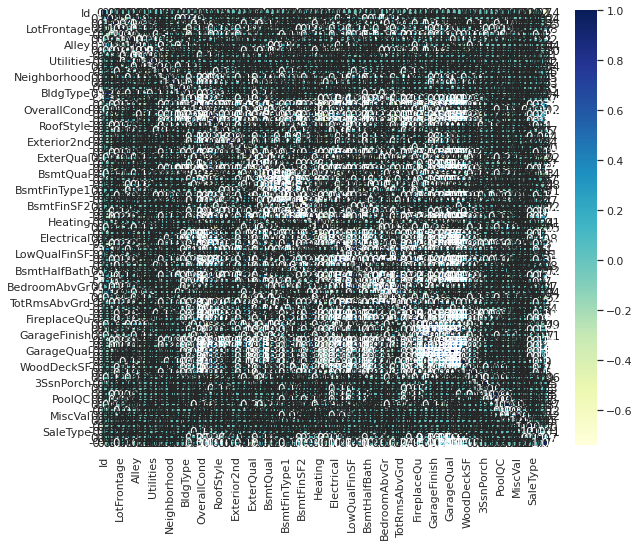

In [224]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,
           fmt = '.2f',
           cmap = 'YlGnBu',
           annot = True)

Now, there are o missing values and we have converted all categories to numerical.

In [225]:
data_temp.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [229]:
# y

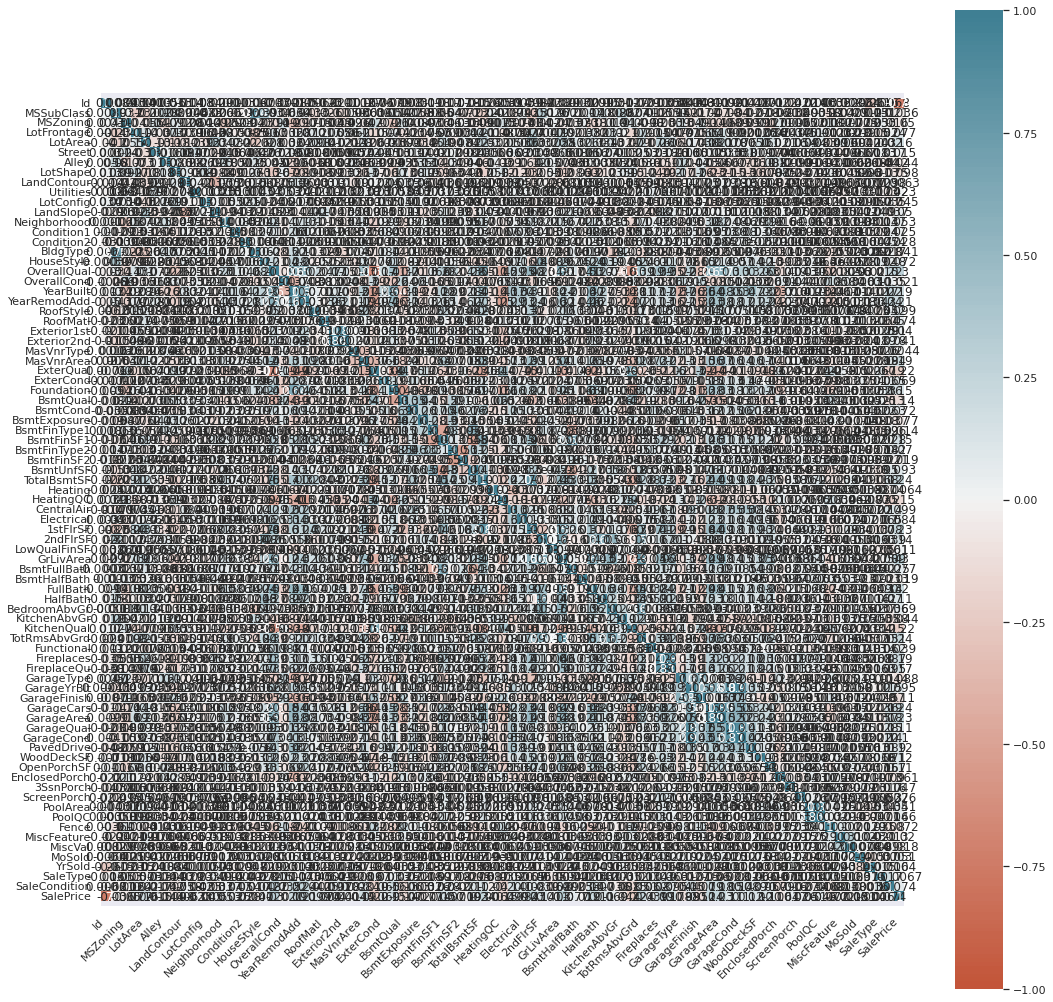

In [257]:


# Correlation of the features
import seaborn as sns
corr = data_temp.corr()

plt.figure(figsize=(18, 18))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);



In [258]:
from sklearn.preprocessing  import StandardScaler
scale = StandardScaler()

In [259]:
# data_temp= scale.transform(data_temp)
train= data_temp.iloc[:train_df.shape[0], :]
test= data_temp.iloc[train_df.shape[0]:, :]

In [260]:
train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,4.028767,57.623288,10516.828082,1.995890,0.090411,2.942466,3.777397,1.000685,...,2.758904,0.010274,0.467123,0.107534,43.489041,6.321918,2007.815753,8.513014,4.770548,180921.195890
std,421.610009,42.300571,0.632017,34.664304,9981.264932,0.063996,0.372151,1.409156,0.707666,0.026171,...,40.177307,0.158916,1.029191,0.555437,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,1.000000,0.000000,1300.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,1.000000,1.000000,34900.000000
25%,365.750000,20.000000,4.000000,42.000000,7553.500000,2.000000,0.000000,1.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,9.000000,5.000000,129975.000000
50%,730.500000,50.000000,4.000000,63.000000,9478.500000,2.000000,0.000000,4.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,9.000000,5.000000,163000.000000
75%,1095.250000,70.000000,4.000000,79.000000,11601.500000,2.000000,0.000000,4.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,9.000000,5.000000,214000.000000
max,1460.000000,190.000000,5.000000,313.000000,215245.000000,2.000000,2.000000,4.000000,4.000000,2.000000,...,738.000000,3.000000,4.000000,4.000000,15500.000000,12.000000,2010.000000,9.000000,6.000000,755000.000000


In [261]:
test.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.0
mean,2190.000000,57.378341,4.015764,57.910212,9819.161069,1.995888,0.098698,2.952707,3.776559,0.998629,...,1.744345,0.003427,0.476354,0.099383,58.167923,6.104181,2007.769705,8.463331,4.787526,0.0
std,421.321334,42.746880,0.715610,32.266054,4955.517327,0.064018,0.373861,1.410751,0.701340,0.037012,...,30.491646,0.086792,1.022361,0.530671,630.806978,2.722432,1.301740,1.649040,1.055436,0.0
min,1461.000000,20.000000,0.000000,0.000000,1470.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,1.000000,0.0
25%,1825.500000,20.000000,4.000000,44.000000,7391.000000,2.000000,0.000000,1.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,9.000000,5.000000,0.0
50%,2190.000000,50.000000,4.000000,63.000000,9399.000000,2.000000,0.000000,4.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,9.000000,5.000000,0.0
75%,2554.500000,70.000000,4.000000,78.000000,11517.500000,2.000000,0.000000,4.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,9.000000,5.000000,0.0
max,2919.000000,190.000000,5.000000,200.000000,56600.000000,2.000000,2.000000,4.000000,4.000000,1.000000,...,800.000000,3.000000,4.000000,3.000000,17000.000000,12.000000,2010.000000,9.000000,6.000000,0.0


In [262]:
from sklearn.preprocessing  import StandardScaler
scale = StandardScaler()
training = scale.fit_transform(train)
testing = scale.transform(test)

In [263]:
training = pd.DataFrame(data = training, columns = train.columns)

In [264]:
training.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,-0.045532,0.212877,-0.207142,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-1.599111,0.138777,0.313867,0.208502,0.347273
1,-1.728492,-0.872563,-0.045532,0.645747,-0.091886,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.489110,-0.614439,0.313867,0.208502,0.007288
2,-1.726120,0.073375,-0.045532,0.299451,0.073480,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
3,-1.723747,0.309859,-0.045532,0.068587,-0.096897,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.515281
4,-1.721374,0.073375,-0.045532,0.761179,0.375148,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,2.100892,0.138777,0.313867,0.208502,0.869843


In [265]:
testing = pd.DataFrame(data =testing, columns = test.columns)

In [266]:
testing.drop(["SalePrice"], axis = 1, inplace = True)

In [267]:
testing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.733238,-0.872563,-1.628309,0.645747,0.110763,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,1.882709,-0.068692,-0.064673,2.46188,-0.193669,-0.087688,-0.119110,1.64521,0.313867,0.208502
1,1.735610,-0.872563,-0.045532,0.674605,0.375850,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,1.607331,25.116309,-0.119110,1.64521,0.313867,0.208502
2,1.737983,0.073375,-0.045532,0.472599,0.332053,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,2.46188,-0.193669,-0.087688,-1.229111,1.64521,0.313867,0.208502
3,1.740356,0.073375,-0.045532,0.588031,-0.054002,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.119110,1.64521,0.313867,0.208502
4,1.742728,1.492282,-0.045532,-0.421999,-0.552407,0.064238,-0.243025,-1.378933,-2.512494,-0.02618,...,2.313293,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-1.969111,1.64521,0.313867,0.208502


In [268]:
testing.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,3.462916,0.011377,-0.020581,0.008280,-0.069922,-0.000044,0.022275,0.007270,-0.001185,-0.078576,...,0.035944,-0.025261,-0.043100,0.008972,-0.014680,0.029597,-0.080563,-0.034684,-0.032021,0.015428
std,0.999658,1.010897,1.132650,0.931134,0.496652,1.000684,1.004940,1.001475,0.991401,1.414697,...,1.015635,0.759187,0.546337,0.993704,0.955738,1.271909,1.007301,0.980492,1.062821,0.959071
min,1.733238,-0.872563,-6.376640,-1.662893,-0.906691,-15.567059,-0.243025,-1.378933,-3.926074,-38.249219,...,-0.270208,-0.068692,-0.064673,-0.454030,-0.193669,-0.087688,-1.969111,-1.367655,-5.486715,-3.426284
25%,2.598077,-0.872563,-0.045532,-0.393141,-0.313277,0.064238,-0.243025,-1.378933,0.314667,-0.026180,...,-0.270208,-0.068692,-0.064673,-0.454030,-0.193669,-0.087688,-0.859110,-0.614439,0.313867,0.208502
50%,3.462916,-0.163109,-0.045532,0.155161,-0.112031,0.064238,-0.243025,0.750731,0.314667,-0.026180,...,-0.270208,-0.068692,-0.064673,-0.454030,-0.193669,-0.087688,-0.119110,0.138777,0.313867,0.208502
75%,4.327755,0.309859,-0.045532,0.588031,0.100289,0.064238,-0.243025,0.750731,0.314667,-0.026180,...,-0.270208,-0.068692,-0.064673,-0.454030,-0.193669,-0.087688,0.620891,0.891994,0.313867,0.208502
max,5.192595,3.147673,1.537245,4.108708,4.618549,0.064238,5.132985,0.750731,0.314667,-0.026180,...,10.063796,19.849869,18.819726,3.433850,5.209330,34.189748,2.100892,1.645210,0.313867,1.117199


In [269]:
training.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,...,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,8.243026e-17,-1.504124e-16,5.604060e-16,1.028857e-16,-4.202783e-17,-1.191418e-15,9.573773e-17,-9.961590e-17,-1.010607e-16,-9.441886e-16,...,-7.945889e-16,1.055035e-15,2.088892e-16,3.920000e-17,2.409602e-16,-6.395189e-17,3.566101e-14,-6.452221e-16,-3.956880e-16,1.180182e-16
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,...,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-1.730865e+00,-8.725628e-01,-4.793863e+00,-1.662893e+00,-9.237292e-01,-1.556706e+01,-2.430251e-01,-1.378933e+00,-3.926074e+00,-2.618016e-02,...,-6.869175e-02,-6.467260e-02,-4.540299e-01,-1.936692e-01,-8.768781e-02,-1.969111e+00,-1.367655e+00,-4.842206e+00,-3.426284e+00,-1.838704e+00
25%,-8.654324e-01,-8.725628e-01,-4.553194e-02,-4.508569e-01,-2.969908e-01,6.423821e-02,-2.430251e-01,-1.378933e+00,3.146669e-01,-2.618016e-02,...,-6.869175e-02,-6.467260e-02,-4.540299e-01,-1.936692e-01,-8.768781e-02,-4.891101e-01,-6.144386e-01,3.138671e-01,2.085023e-01,-6.415162e-01
50%,0.000000e+00,-1.631095e-01,-4.553194e-02,1.551612e-01,-1.040633e-01,6.423821e-02,-2.430251e-01,7.507306e-01,3.146669e-01,-2.618016e-02,...,-6.869175e-02,-6.467260e-02,-4.540299e-01,-1.936692e-01,-8.768781e-02,-1.191097e-01,1.387775e-01,3.138671e-01,2.085023e-01,-2.256643e-01
75%,8.654324e-01,3.098594e-01,-4.553194e-02,6.168893e-01,1.087080e-01,6.423821e-02,-2.430251e-01,7.507306e-01,3.146669e-01,-2.618016e-02,...,-6.869175e-02,-6.467260e-02,-4.540299e-01,-1.936692e-01,-8.768781e-02,6.208910e-01,8.919936e-01,3.138671e-01,2.085023e-01,4.165294e-01
max,1.730865e+00,3.147673e+00,1.537245e+00,7.369662e+00,2.051827e+01,6.423821e-02,5.132985e+00,7.507306e-01,3.146669e-01,3.819686e+01,...,1.830618e+01,1.881973e+01,3.433850e+00,7.010330e+00,3.116527e+01,2.100892e+00,1.645210e+00,3.138671e-01,1.117199e+00,7.228819e+00


In [270]:
X = training.loc[:,"Id":"SaleCondition":1]
y =training.SalePrice

In [271]:
y

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
          ...   
1455   -0.074560
1456    0.366161
1457    1.077611
1458   -0.488523
1459   -0.420841
Name: SalePrice, Length: 1460, dtype: float64

In [272]:
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-1.730865,0.073375,-0.045532,0.212877,-0.207142,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-1.599111,0.138777,0.313867,0.208502
1,-1.728492,-0.872563,-0.045532,0.645747,-0.091886,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.489110,-0.614439,0.313867,0.208502
2,-1.726120,0.073375,-0.045532,0.299451,0.073480,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,0.990891,0.138777,0.313867,0.208502
3,-1.723747,0.309859,-0.045532,0.068587,-0.096897,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-1.599111,-1.367655,0.313867,-3.426284
4,-1.721374,0.073375,-0.045532,0.761179,0.375148,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,2.100892,0.138777,0.313867,0.208502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.045532,0.126303,-0.260560,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,0.620891,-0.614439,0.313867,0.208502
1456,1.723747,-0.872563,-0.045532,0.790037,0.266407,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,2.46188,-0.193669,-0.087688,-1.599111,1.645210,0.313867,0.208502
1457,1.726120,0.309859,-0.045532,0.241735,-0.147810,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,0.51794,5.209330,4.953112,-0.489110,1.645210,0.313867,0.208502
1458,1.728492,-0.872563,-0.045532,0.299451,-0.080160,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.859110,1.645210,0.313867,0.208502


In [321]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error as MSE, r2_score
# import mean_squared_error as MSE

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=43)

In [323]:
X_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
988,0.613336,0.073375,-0.045532,-1.662893,0.153257,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.119110,-0.614439,0.313867,0.208502
450,-0.663162,-0.636078,1.537245,0.357167,-0.484356,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.119110,-1.367655,0.313867,0.208502
950,0.523174,-0.872563,-0.045532,0.068587,-0.332419,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,0.250891,-0.614439,0.313867,0.208502
179,-1.306156,-0.636078,1.537245,0.068587,-0.200126,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,0.250891,-0.614439,0.313867,0.208502
696,-0.079485,-0.636078,1.537245,-0.219993,-0.452686,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.119110,-1.367655,0.313867,0.208502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,-1.692902,-0.872563,-0.045532,-1.662893,0.072578,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,5.209330,1.323736,-1.229111,1.645210,0.313867,0.208502
58,-1.593250,0.073375,-0.045532,0.241735,0.317220,0.064238,-0.243025,-0.669045,-2.512494,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,1.360892,-1.367655,-0.975151,1.117199
277,-1.073634,-0.872563,-0.045532,2.377228,0.864031,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.119110,1.645210,0.313867,0.208502
255,-1.125833,0.073375,-0.045532,0.241735,-0.178278,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-1.599111,-1.367655,0.313867,0.208502


In [324]:
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
860,0.309634,-0.163109,-0.045532,-0.075703,-0.288121,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,0.51794,-0.193669,-0.087688,-0.119110,-0.614439,0.313867,0.208502
1146,0.988218,-0.872563,-0.045532,-1.662893,0.068469,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.489110,-1.367655,0.313867,0.208502
1092,0.860094,-0.163109,-0.045532,0.068587,-0.212153,0.064238,-0.243025,0.750731,-3.926074,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.119110,0.138777,0.313867,0.208502
1018,0.684516,0.546344,-0.045532,-1.662893,0.026777,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.489110,-0.614439,0.313867,0.208502
628,-0.240826,0.073375,-0.045532,0.357167,0.109159,0.064238,-0.243025,-1.378933,-2.512494,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,0.990891,-0.614439,0.313867,-0.700194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,-1.401063,0.073375,-0.045532,0.212877,0.492007,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,2.46188,-0.193669,-0.087688,0.620891,0.891994,0.313867,0.208502
911,0.430640,-0.872563,-0.045532,-1.662893,-0.123356,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,1.360892,0.891994,0.313867,0.208502
1162,1.026181,-0.872563,-0.045532,1.482629,-0.179681,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.489110,-0.614439,0.313867,0.208502
186,-1.289548,0.546344,-0.045532,-1.662893,-0.057109,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.270208,-0.068692,-0.064673,0.51794,-0.193669,-0.087688,-0.119110,0.891994,0.313867,0.208502


In [325]:
y_train

988     0.177281
450    -0.893042
950    -0.653793
179    -1.018962
696    -1.157475
          ...   
16     -0.401953
58      3.246967
277    -0.502689
255     0.618002
1344   -0.315886
Name: SalePrice, Length: 978, dtype: float64

In [326]:
print(y_test)
type(y_test)

860     0.113691
1146   -0.011600
1092   -0.559353
1018   -0.263440
628    -0.578241
          ...   
139     0.636890
911    -0.471209
1162   -0.653793
186    -0.099744
846     0.403937
Name: SalePrice, Length: 482, dtype: float64


pandas.core.series.Series

In [327]:
model = LinearRegression(normalize=False)

In [328]:
model.fit(X_train, y_train)

LinearRegression()

In [329]:
y_pred = model.predict(X_test)

In [330]:
type(y_pred)

numpy.ndarray

In [331]:
model.score(X_test,y_test)

0.8222952993213917

In [332]:
print("Score of the train set",model.score(X_train,y_train))

Score of the train set 0.8782962853535067


In [333]:
r2_score(y_test,y_pred)

0.8222952993213917

In [334]:
# MSE(y_test, y_pred)

In [335]:
#combined rmse value
rss=((y_test-y_pred)**2).sum()
mse=np.mean((y_test-y_pred)**2)
print("Final rmse value is =",np.sqrt(np.mean((y_test-y_pred)**2)))

Final rmse value is = 0.4241193275408089


In [336]:
print("MSE: ", mse)

MSE:  0.17987720399366794


## my first submissiion sample 

In [337]:
# sample_df.Response = model.predict(testing)
# sample_df.to_csv("Submission_3.csv", index=False)

In [338]:
model.coef_

array([-5.49144485e-03, -2.33957688e-02, -2.25902003e-02, -1.47353595e-02,
        2.18452138e-02,  1.78288963e-02, -2.23606903e-02, -1.54527918e-02,
        8.66291639e-03, -1.32466045e-02,  2.72924973e-04,  3.08916472e-02,
        2.18589036e-02, -6.00432482e-03, -2.68014694e-04, -3.73575012e-02,
       -1.47910429e-02,  1.57134661e-01,  1.08168677e-01,  1.04775004e-01,
       -2.28923167e-02,  2.10430328e-02,  7.36598664e-02, -4.56500464e-02,
        3.67088381e-02,  4.47070756e-02,  5.53978538e-02, -9.38461518e-02,
        2.05472579e-02, -7.36641461e-03, -7.80347763e-02,  2.76955508e-02,
       -5.69518911e-02, -1.41553917e-02, -8.52939155e+11,  4.18754524e-02,
       -3.01679676e+11, -8.26325817e+11,  8.20413320e+11, -2.12589220e-02,
       -1.33301201e-02, -1.24413656e-02,  5.83870751e-03, -6.57436769e+11,
       -7.42366651e+11, -8.26891243e+10,  8.93639635e+11,  3.24992538e-02,
       -6.35065637e-03,  1.28685917e-02,  7.93559191e-03, -5.62686483e-02,
       -6.42948149e-02, -

In [339]:
importance = model.coef_
for i in range(len(importance)):
    print("Feature:", training.columns[i], ", Score:", importance[i])

Feature: Id , Score: -0.0054914448468161205
Feature: MSSubClass , Score: -0.023395768764048842
Feature: MSZoning , Score: -0.02259020031386419
Feature: LotFrontage , Score: -0.014735359513185026
Feature: LotArea , Score: 0.02184521379179473
Feature: Street , Score: 0.017828896311207654
Feature: Alley , Score: -0.022360690339182927
Feature: LotShape , Score: -0.01545279177580014
Feature: LandContour , Score: 0.00866291639247127
Feature: Utilities , Score: -0.013246604523940171
Feature: LotConfig , Score: 0.00027292497317277925
Feature: LandSlope , Score: 0.0308916471768656
Feature: Neighborhood , Score: 0.02185890364051489
Feature: Condition1 , Score: -0.0060043248189305025
Feature: Condition2 , Score: -0.00026801469418710755
Feature: BldgType , Score: -0.03735750118979045
Feature: HouseStyle , Score: -0.014791042916670685
Feature: OverallQual , Score: 0.15713466079638816
Feature: OverallCond , Score: 0.10816867658820029
Feature: YearBuilt , Score: 0.10477500350071518
Feature: YearRemod

## handling outlierrs

In [340]:
# Scaling
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(training))
z

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.730865,0.073375,0.045532,0.212877,0.207142,0.064238,0.243025,0.750731,0.314667,0.02618,...,0.068692,0.064673,0.45403,0.193669,0.087688,1.599111,0.138777,0.313867,0.208502,0.347273
1,1.728492,0.872563,0.045532,0.645747,0.091886,0.064238,0.243025,0.750731,0.314667,0.02618,...,0.068692,0.064673,0.45403,0.193669,0.087688,0.489110,0.614439,0.313867,0.208502,0.007288
2,1.726120,0.073375,0.045532,0.299451,0.073480,0.064238,0.243025,1.378933,0.314667,0.02618,...,0.068692,0.064673,0.45403,0.193669,0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
3,1.723747,0.309859,0.045532,0.068587,0.096897,0.064238,0.243025,1.378933,0.314667,0.02618,...,0.068692,0.064673,0.45403,0.193669,0.087688,1.599111,1.367655,0.313867,3.426284,0.515281
4,1.721374,0.073375,0.045532,0.761179,0.375148,0.064238,0.243025,1.378933,0.314667,0.02618,...,0.068692,0.064673,0.45403,0.193669,0.087688,2.100892,0.138777,0.313867,0.208502,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,0.045532,0.126303,0.260560,0.064238,0.243025,0.750731,0.314667,0.02618,...,0.068692,0.064673,0.45403,0.193669,0.087688,0.620891,0.614439,0.313867,0.208502,0.074560
1456,1.723747,0.872563,0.045532,0.790037,0.266407,0.064238,0.243025,0.750731,0.314667,0.02618,...,0.068692,0.064673,2.46188,0.193669,0.087688,1.599111,1.645210,0.313867,0.208502,0.366161
1457,1.726120,0.309859,0.045532,0.241735,0.147810,0.064238,0.243025,0.750731,0.314667,0.02618,...,0.068692,0.064673,0.51794,5.209330,4.953112,0.489110,1.645210,0.313867,0.208502,1.077611
1458,1.728492,0.872563,0.045532,0.299451,0.080160,0.064238,0.243025,0.750731,0.314667,0.02618,...,0.068692,0.064673,0.45403,0.193669,0.087688,0.859110,1.645210,0.313867,0.208502,0.488523


In [341]:
len(np.where(z > 7)[0])

110

In [342]:
outliers = list(set(np.where(z > 3)[0]))
new_df = training.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]
len(y_new)

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,-1.730865,0.073375,-0.045532,0.212877,-0.207142,0.064238,-0.243025,0.750731,0.314667,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-1.599111,0.138777,0.313867,0.208502,0.347273
1,2,-1.726120,0.073375,-0.045532,0.299451,0.073480,0.064238,-0.243025,-1.378933,0.314667,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
2,4,-1.721374,0.073375,-0.045532,0.761179,0.375148,0.064238,-0.243025,-1.378933,0.314667,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,2.100892,0.138777,0.313867,0.208502,0.869843
3,6,-1.716629,-0.872563,-0.045532,0.501457,-0.043379,0.064238,-0.243025,0.750731,0.314667,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,0.620891,-0.614439,0.313867,0.208502,1.587588
4,10,-1.707138,-0.872563,-0.045532,0.357167,0.068469,0.064238,-0.243025,0.750731,0.314667,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-1.599111,0.138777,0.313867,0.208502,-0.647497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,1446,1.700020,-0.872563,-0.045532,-1.662893,1.565986,0.064238,-0.243025,-1.378933,0.314667,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.859110,1.645210,0.313867,0.208502,-0.289884
597,1447,1.702393,0.073375,-0.045532,0.645747,-0.051798,0.064238,-0.243025,0.750731,0.314667,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,2.100892,-0.614439,0.313867,0.208502,0.743922
598,1451,1.711883,-0.872563,-0.045532,0.588031,-0.125761,0.064238,-0.243025,0.750731,0.314667,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.489110,0.891994,-0.975151,1.117199,1.336881
599,1452,1.714256,2.911188,1.537245,-0.652863,-0.685702,0.064238,-0.243025,0.750731,0.314667,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.489110,-1.367655,0.313867,0.208502,-0.452321


601

In [343]:
y_new

0       0.347273
2       0.536154
4       0.869843
6       1.587588
10     -0.647497
          ...   
1446   -0.289884
1447    0.743922
1451    1.336881
1452   -0.452321
1455   -0.074560
Name: SalePrice, Length: 601, dtype: float64

/home/c4leb/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

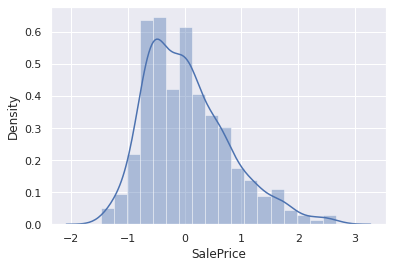

In [344]:
sns.distplot(y_new)

In [353]:
## still on the outliers
training

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,-0.045532,0.212877,-0.207142,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-1.599111,0.138777,0.313867,0.208502,0.347273
1,-1.728492,-0.872563,-0.045532,0.645747,-0.091886,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.489110,-0.614439,0.313867,0.208502,0.007288
2,-1.726120,0.073375,-0.045532,0.299451,0.073480,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
3,-1.723747,0.309859,-0.045532,0.068587,-0.096897,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.515281
4,-1.721374,0.073375,-0.045532,0.761179,0.375148,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,2.100892,0.138777,0.313867,0.208502,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.045532,0.126303,-0.260560,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,0.620891,-0.614439,0.313867,0.208502,-0.074560
1456,1.723747,-0.872563,-0.045532,0.790037,0.266407,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,2.46188,-0.193669,-0.087688,-1.599111,1.645210,0.313867,0.208502,0.366161
1457,1.726120,0.309859,-0.045532,0.241735,-0.147810,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,0.51794,5.209330,4.953112,-0.489110,1.645210,0.313867,0.208502,1.077611
1458,1.728492,-0.872563,-0.045532,0.299451,-0.080160,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.859110,1.645210,0.313867,0.208502,-0.488523


In [377]:
def determine_outlier_thresholds_std(training):
    upper_boundary = training.mean() + 3 * training.std()
    lower_boundary = training.mean() - 3 * training.std()
#     return lower_boundary, upper_boundary
    return sns.distplot(upper_boundary)

/home/c4leb/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

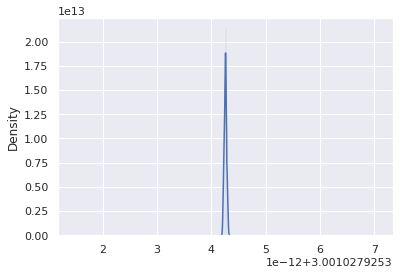

In [378]:
determine_outlier_thresholds_std(training)

In [299]:
Training = training[(z < 3).all(axis=1)]

In [300]:
Training

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,-0.045532,0.212877,-0.207142,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-1.599111,0.138777,0.313867,0.208502,0.347273
2,-1.726120,0.073375,-0.045532,0.299451,0.073480,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
4,-1.721374,0.073375,-0.045532,0.761179,0.375148,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,2.100892,0.138777,0.313867,0.208502,0.869843
6,-1.716629,-0.872563,-0.045532,0.501457,-0.043379,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,0.620891,-0.614439,0.313867,0.208502,1.587588
10,-1.707138,-0.872563,-0.045532,0.357167,0.068469,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-1.599111,0.138777,0.313867,0.208502,-0.647497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,1.700020,-0.872563,-0.045532,-1.662893,1.565986,0.064238,-0.243025,-1.378933,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.859110,1.645210,0.313867,0.208502,-0.289884
1447,1.702393,0.073375,-0.045532,0.645747,-0.051798,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,2.100892,-0.614439,0.313867,0.208502,0.743922
1451,1.711883,-0.872563,-0.045532,0.588031,-0.125761,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.489110,0.891994,-0.975151,1.117199,1.336881
1452,1.714256,2.911188,1.537245,-0.652863,-0.685702,0.064238,-0.243025,0.750731,0.314667,-0.02618,...,-0.068692,-0.064673,-0.45403,-0.193669,-0.087688,-0.489110,-1.367655,0.313867,0.208502,-0.452321


In [160]:
# plt.scatter(X_train, y_train, c='red')
# plt.show()

In [147]:
# plt.plot(X_test,y_pred)   
# plt.scatter(X_test,y_test,c='red')
# plt.xlabel('SaleDEtails')
# plt.ylabel('Saleprice')

In [134]:
# submission_sample.Response = model.predict(test)
# submission_sample.to_csv("Submission_1.csv", index=False)